In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load the MNIST dataset from CSV files
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

# Separate features (pixel values) and labels
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalize pixel values from 0–255 to 0–1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape input to match CNN expected format (samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (60000, 28, 28, 1)
Testing set shape: (10000, 28, 28, 1)


In [2]:


# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer + pooling
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout to prevent overfitting
model.add(Dropout(0.25))

# Flatten to convert 2D to 1D
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 10 digit classes
model.add(Dense(10, activation='softmax'))






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                     

In [3]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the CNN model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=256,
    verbose=2
)


Epoch 1/10


235/235 - 49s - loss: 0.2877 - accuracy: 0.9112 - val_loss: 0.0645 - val_accuracy: 0.9793 - 49s/epoch - 206ms/step
Epoch 2/10
235/235 - 46s - loss: 0.0970 - accuracy: 0.9714 - val_loss: 0.0432 - val_accuracy: 0.9847 - 46s/epoch - 195ms/step
Epoch 3/10
235/235 - 46s - loss: 0.0701 - accuracy: 0.9787 - val_loss: 0.0380 - val_accuracy: 0.9860 - 46s/epoch - 195ms/step
Epoch 4/10
235/235 - 47s - loss: 0.0566 - accuracy: 0.9826 - val_loss: 0.0336 - val_accuracy: 0.9885 - 47s/epoch - 201ms/step
Epoch 5/10
235/235 - 47s - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0319 - val_accuracy: 0.9897 - 47s/epoch - 198ms/step
Epoch 6/10
235/235 - 48s - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0321 - val_accuracy: 0.9904 - 48s/epoch - 205ms/step
Epoch 7/10
235/235 - 46s - loss: 0.0361 - accuracy: 0.9882 - val_loss: 0.0298 - val_accuracy: 0.9900 - 46s/epoch - 196ms/step
Epoch 8/10
235/235 - 45s - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0291 - val_accuracy: 0.9902 - 45s/epoch - 1

Test Accuracy: 0.9913
Test Loss: 0.0301


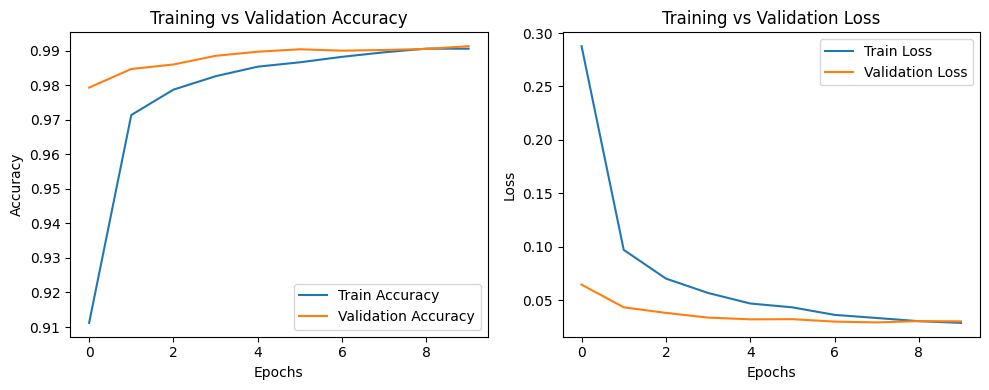

In [4]:
# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(10, 4))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
